In [1]:
import glob
from pyteomics import mzid
import numpy as np
import matplotlib.pyplot as plt
import os
from venn import venn
import numpy 
import collections
import pandas as pd

In [2]:
# read in 4 mzid files (one for each merging method)
mzid_file = os.environ.get('MZID_FILE', '../data/01650b_BA5-TUM_first_pool_75_01_01-3xHCD-1h-R2-features-index-percolator-fdr-filter.mzid')
# names of methods
sample_name = os.path.basename(mzid_file)

In [3]:
mzid_dfr = mzid.DataFrame(mzid_file)
df['isDecoy'] = df['accession'].apply(lambda r: all(a.endswith('DECOY') for a in r))

In [4]:
# Print simple stats
reported_values = (len(mzid_dfr.index), len(mzid_dfr['PeptideSequence'].unique()), len(mzid_dfr[mzid_dfr['protein_references'].str.match('unique')].index),len(set(mzid_dfr['accession'].sum())))
data = [reported_values]
pd.DataFrame(data, columns=["# PSMs", "# Peptide Sequences", '# Unique Peptides', '# Proteins'])

,# PSMs,# Peptide Sequences,# Unique Peptides,# Proteins
0,42712,3513,38706,518


In [5]:
def evalue_log_hist(values, title, bin_value):
    np.log10(values).hist(bins=bin_value)
    plt.title(title)

In [6]:
def evalue_hist(values, title, bin_value):
    np.histogram(values, bins='auto')
    plt.title(title)

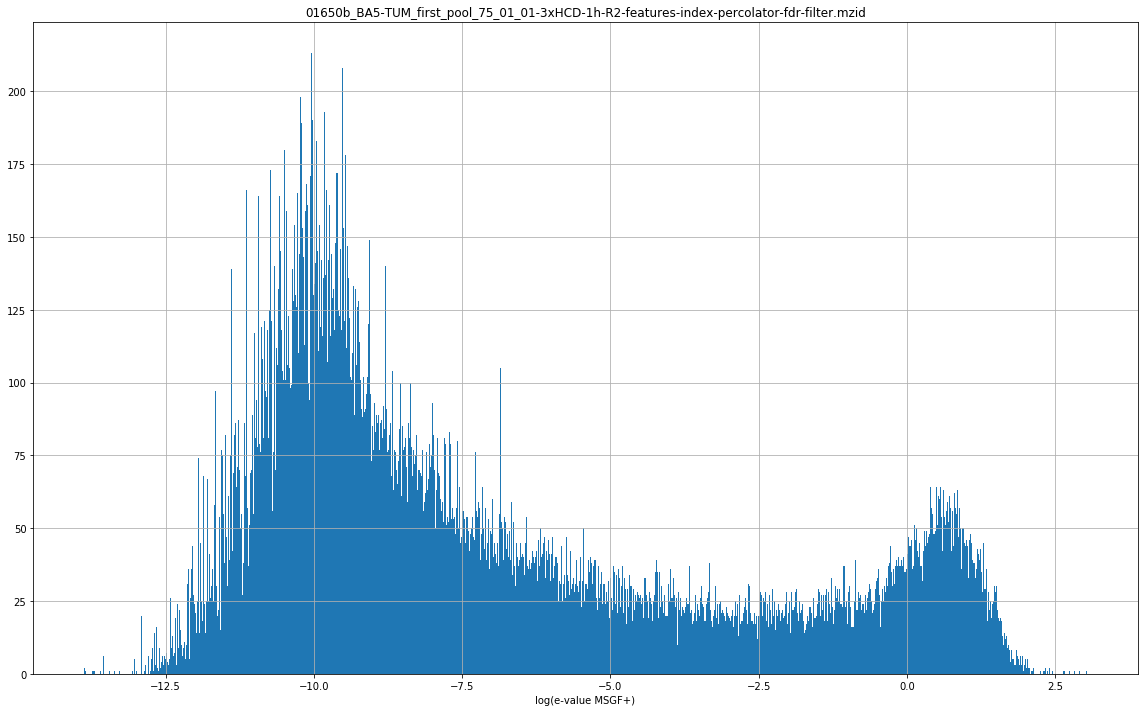

In [7]:
# Original search engine MSGF+
plt.figure(figsize=(16, 10))
plt.subplot(1, 1, 1)
evalue_log_hist(mzid_dfr['MS-GF:EValue'], sample_name, 1000)
plt.xlabel('log(e-value MSGF+)')
plt.tight_layout()

In [1]:
# Original search engine Percolator
plt.figure(figsize=(16, 10))
plt.subplot(1, 1, 1)
evalue_log_hist(mzid_dfr['percolator:PEP'], sample_name, 1000)
plt.xlabel('log(e-value Percolator)')
plt.tight_layout()

NameError: name 'plt' is not defined

[]

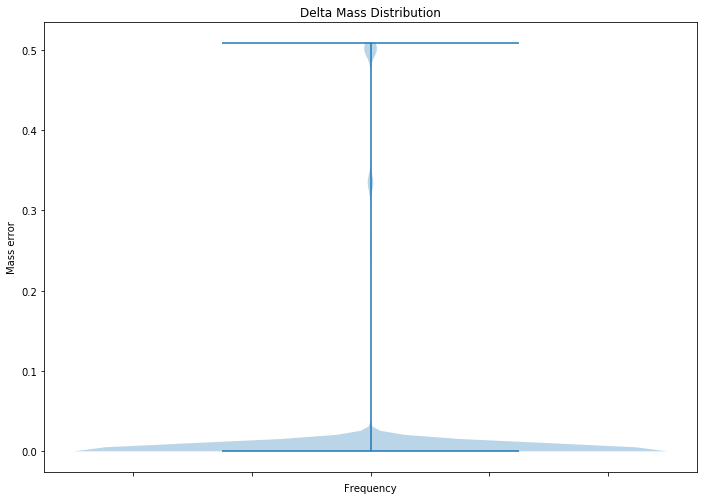

In [9]:
delta_mass = mzid_dfr['experimentalMassToCharge'] - mzid_dfr['calculatedMassToCharge']
fig,ax = plt.subplots(1)
fig.set_size_inches(11.7, 8.27)
ax.violinplot(np.abs(delta_mass))
ax.set_title('Delta Mass Distribution')
ax.set_ylabel('Mass error')
ax.set_xlabel('Frequency')
ax.set_xticklabels([])

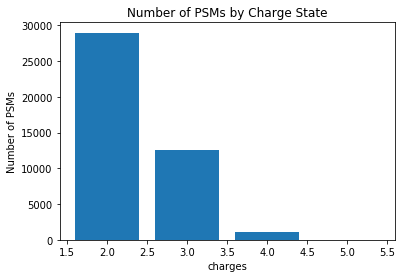

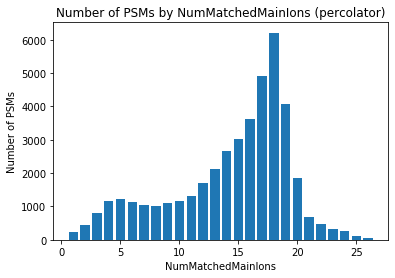

Text(0, 0.5, 'Number of PSMs')

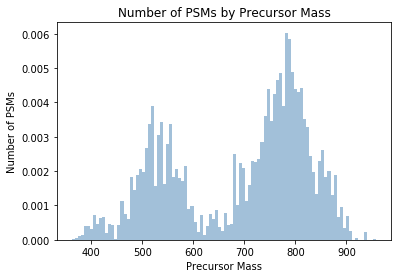

In [18]:
# Charge and mz precursor values vs number of peptides. 
charges, counts = np.unique(mzid_dfr['chargeState'], return_counts=True)
plt.bar(charges, counts)
plt.title('Number of PSMs by Charge State')
plt.xlabel('charges')
plt.ylabel('Number of PSMs')
plt.show()

# Charge and mz precursor values vs number of peptides. 
charges, counts = np.unique(mzid_dfr['NumMatchedMainIons'], return_counts=True)
plt.bar(charges, counts)
plt.title('Number of PSMs by NumMatchedMainIons (percolator)')
plt.xlabel('NumMatchedMainIons')
plt.ylabel('Number of PSMs')
plt.show()

plt.hist(mzid_dfr['experimentalMassToCharge'], bins=100, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');
plt.title('Number of PSMs by Precursor Mass')
plt.xlabel('Precursor Mass')
plt.ylabel('Number of PSMs')